In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from pandas_datareader import data as web
import yfinance as yf
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from scipy.stats import norm


In [2]:
initial_amount = 10000 #Ten thousand BRL. 
tickers = ["TAEE3.SA"]
yf.pdr_override()
start_date = "2023-01-01"
end_date = datetime.today().strftime('%Y-%m-%d')
data = round(web.get_data_yahoo(tickers, start=start_date, end=end_date), 2)
short_window = 7
long_window = 90


data['SMA_Short'] = data['Close'].rolling(window=short_window).mean().round(2)
data['SMA_Long'] = data['Close'].rolling(window=long_window).mean().round(2)

data['EMA_Short'] = data['Close'].ewm(span=short_window).mean().round(2)
data['EMA_Long'] = data['Close'].ewm(span=long_window).mean().round(2)
data.dropna(inplace=True)
data.iloc[:, :8].head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,SMA_Short,SMA_Long
Date,,,,,,,,
2023-05-12,12.31,12.46,12.00,12.36,11.15,155000,12.10,11.84
2023-05-15,12.33,12.45,12.30,12.34,11.13,67700,12.18,11.85
2023-05-16,12.35,12.45,12.28,12.34,11.13,74200,12.23,11.86
2023-05-17,12.30,12.44,12.28,12.33,11.12,75100,12.28,11.87
2023-05-18,12.33,12.49,12.28,12.37,11.16,115000,12.32,11.88


In [3]:
str_mode = "SMA"
str_short = "SMA_Short"
str_long = "SMA_Long"

# Lógica para os buy signals
buy_signals = (data[str_short] > data[str_long]) & (data[str_short].shift(1) <= data[str_long].shift(1))
sell_signals = (data[str_short] < data[str_long]) & (data[str_short].shift(1) >= data[str_long].shift(1))

# Criação da coluna 'Buy_Signal' com 1 para buy signal e 0 caso contrário
data['Buy_Signal'] = np.where(buy_signals, 1, 0)
data['Sell_Signal'] = np.where(sell_signals, -1, 0)

In [4]:
data['Recommend'] = 0
data.loc[data['Buy_Signal'] == 1, 'Recommend'] = 1
data.loc[data['Sell_Signal'] == -1, 'Recommend'] = -1
data = data.drop(['Buy_Signal', 'Sell_Signal'], axis=1)
data[['Recommend']].value_counts()

Recommend
 0           307
-1             3
 1             1
Name: count, dtype: int64

In [5]:
data.loc[data.index[2], 'Recommend'] = 1
data.loc[data.index[8], 'Recommend'] = -1
data.loc[data.index[12], 'Recommend'] = 1
data.loc[data.index[15], 'Recommend'] = -1

data['Profit'] = 0
data = data.head(20)
data

,Open,High,Low,Close,Adj Close,Volume,SMA_Short,SMA_Long,EMA_Short,EMA_Long,Recommend,Profit
Date,,,,,,,,,,,,
2023-05-12,12.31,12.46,12.00,12.36,11.15,155000,12.10,11.84,12.16,11.85,0,0
2023-05-15,12.33,12.45,12.30,12.34,11.13,67700,12.18,11.85,12.20,11.86,0,0
2023-05-16,12.35,12.45,12.28,12.34,11.13,74200,12.23,11.86,12.24,11.87,1,0
2023-05-17,12.30,12.44,12.28,12.33,11.12,75100,12.28,11.87,12.26,11.88,0,0
2023-05-18,12.33,12.49,12.28,12.37,11.16,115000,12.32,11.88,12.29,11.90,0,0
2023-05-19,12.41,12.61,12.35,12.43,11.21,94300,12.35,11.89,12.32,11.91,0,0
2023-05-22,12.42,12.54,12.34,12.35,11.14,57000,12.36,11.89,12.33,11.92,0,0
2023-05-23,12.35,12.44,12.35,12.36,11.15,73900,12.36,11.90,12.34,11.93,0,0
2023-05-24,12.40,12.48,12.20,12.41,11.20,85300,12.37,11.91,12.36,11.94,-1,0


In [6]:
buy_price = 0 
in_position = False 
num_stocks = 0

for index, row in data.iterrows():
    if row['Recommend'] == 1 and not in_position:
        buy_price = row['Adj Close']
        in_position = True 
        num_stocks = int(initial_amount/buy_price)

    elif row['Recommend'] == -1 and in_position:
        sell_price = row['Adj Close']
        data.at[index, 'Profit'] = (sell_price - buy_price) #* num_stocks
        in_position = False 

data.Profit.sum().round(2) 

C:\Users\z004s8rp\AppData\Local\Temp\ipykernel_23976\238883802.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.06999999999999851' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.at[index, 'Profit'] = (sell_price - buy_price) #* num_stocks


-0.14

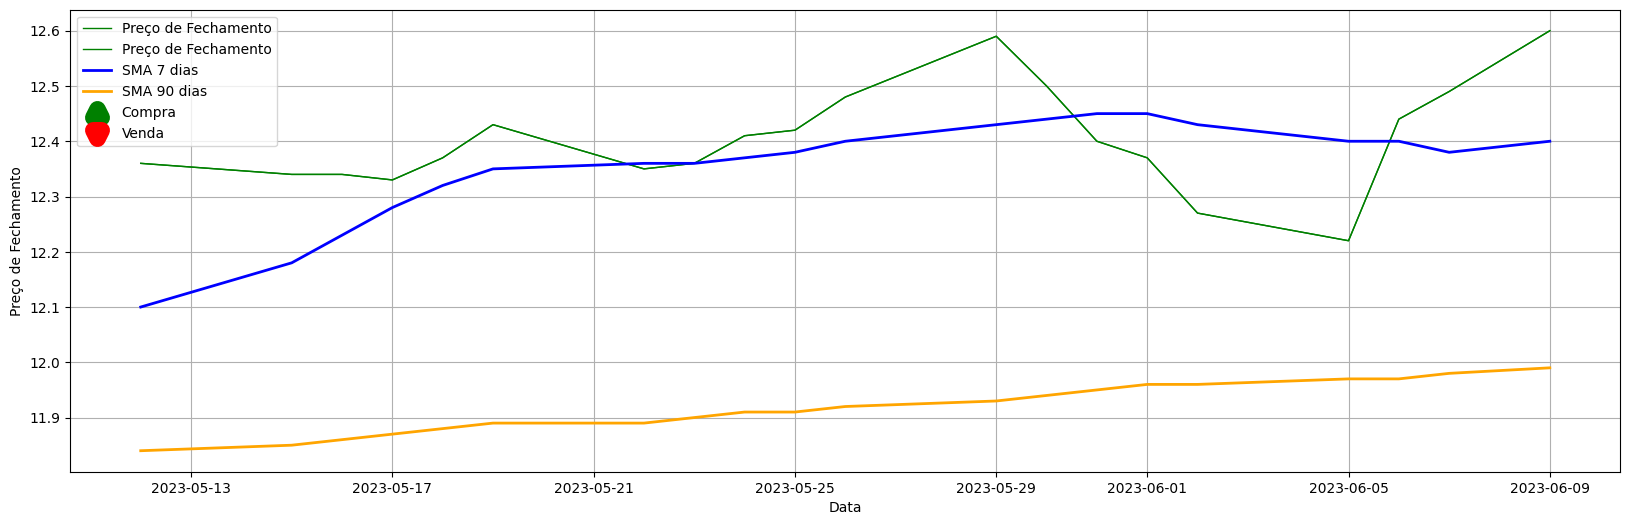

In [7]:
plt.figure(figsize=(20, 6))
plt.plot(data.index, data['Close'], label='Preço de Fechamento', linewidth=1, color='green')
plt.plot(data.index, data['Close'], label='Preço de Fechamento', linewidth=1, color='green')
plt.plot(data.index, data['SMA_Short'], label=f'SMA {short_window} dias', linewidth=2, color='blue')
plt.plot(data.index, data['SMA_Long'], label=f'SMA {long_window} dias', linewidth=2, color='orange')
str_short = "SMA_Short"
str_long = "SMA_Long"
buy_signals = data[(data[str_short] > data[str_long]) & (data[str_short].shift(1) <= data[str_long].shift(1))]
sell_signals = data[(data[str_short] < data[str_long]) & (data[str_short].shift(1) >= data[str_long].shift(1))]
plt.scatter(buy_signals.index, data.loc[buy_signals.index, str_short], marker='^', color='green', linewidth=12, label='Compra')
plt.scatter(sell_signals.index, data.loc[sell_signals.index, str_short], marker='v', color='red', linewidth=12, label='Venda')


plt.xlabel("Data")
plt.ylabel("Preço de Fechamento")
plt.legend()
plt.grid(True)
plt.show()

# 2. Defining Functions

In [8]:
def backtest_moving_average(ticker, start_date, end_date, short_window, long_window, initial_amount, show_graph, moving_average_mode, show_print):
    yf.pdr_override()
    data = round(web.get_data_yahoo(ticker, start=start_date, end=end_date), 2)


    data['SMA_Short'] = data['Close'].rolling(window=short_window).mean().round(2)
    data['SMA_Long'] = data['Close'].rolling(window=long_window).mean().round(2)

    data['EMA_Short'] = data['Close'].ewm(span=short_window).mean().round(2)
    data['EMA_Long'] = data['Close'].ewm(span=long_window).mean().round(2)

    data.dropna(inplace=True)

    if moving_average_mode == "sma":
        str_short = "SMA_Short"
        str_long = "SMA_Long"
    elif moving_average_mode == "ema":
        str_short = "EMA_Short"
        str_long = "EMA_Long"

    # Lógica para os buy signals
    buy_signals = (data[str_short] > data[str_long]) & (data[str_short].shift(1) <= data[str_long].shift(1))
    sell_signals = (data[str_short] < data[str_long]) & (data[str_short].shift(1) >= data[str_long].shift(1))

    # Criação da coluna 'Buy_Signal' com 1 para buy signal e 0 caso contrário
    data['Buy_Signal'] = np.where(buy_signals, 1, 0)
    data['Sell_Signal'] = np.where(sell_signals, -1, 0)


    data['Recommend'] = 0
    data.loc[data['Buy_Signal'] == 1, 'Recommend'] = 1
    data.loc[data['Sell_Signal'] == -1, 'Recommend'] = -1
    data = data.drop(['Buy_Signal', 'Sell_Signal'], axis=1)
    data['Profit'] = 0
    buy_price = 0 
    in_position = False 
    num_stocks = 0

    for index, row in data.iterrows():
        if initial_amount> 0:
            if row['Recommend'] == 1 and not in_position:
                buy_price = row['Adj Close']
                in_position = True 
                num_stocks = int(initial_amount/buy_price)

            elif row['Recommend'] == -1 and in_position:
                sell_price = row['Adj Close']
                profit = (int((sell_price - buy_price) * num_stocks)) 
                data.at[index, 'Profit'] = profit

                if profit < 0:
                    initial_amount += profit
                in_position = False
        else:
            print("Lost all amount.")
            break
    last_recommendation = data['Recommend'].loc[data['Recommend'] != 0].iloc[-1] if not data['Recommend'].loc[data['Recommend'] != 0].empty else None
    
    if (show_print):
        print(f"-------------------------------------------------------------------------")
        print(f"Ticker {ticker}")
        print(f"Short Window: {short_window} - Long Window {long_window}")
        print(f"Profit obtained: BRL {data['Profit'].sum()}")
        print(f"Yield of the investment: {round(data['Profit'].sum() * 100 /initial_amount, 2)} %")
        print(f"Last recommendation: {last_recommendation}")   

    if(show_graph):
        plot_graph(data, str_short, str_long)
    return ticker, data['Profit'].sum(), round(data['Profit'].sum() * 100 /initial_amount, 2), last_recommendation

In [9]:
def plot_graph(data, str_short, str_long):
    plt.figure(figsize=(20, 6))
    plt.plot(data.index, data['Close'], label='Preço de Fechamento', linewidth=1, color='green')
    plt.plot(data.index, data['Close'], label='Preço de Fechamento', linewidth=1, color='green')
    plt.plot(data.index, data[str_short], label=f'{str_short[:3]} {short_window} dias', linewidth=2, color='blue')
    plt.plot(data.index, data[str_long], label=f'{str_short[:3]} {long_window} dias', linewidth=2, color='orange') 
    buy_signals = data[(data[str_short] > data[str_long]) & (data[str_short].shift(1) <= data[str_long].shift(1))]
    sell_signals = data[(data[str_short] < data[str_long]) & (data[str_short].shift(1) >= data[str_long].shift(1))]
    plt.scatter(buy_signals.index, data.loc[buy_signals.index, str_short], marker='^', color='green', linewidth=5, label='Compra')
    plt.scatter(sell_signals.index, data.loc[sell_signals.index, str_short], marker='v', color='red', linewidth=5, label='Venda')


    plt.xlabel("Data")
    plt.ylabel("Preço de Fechamento")
    plt.legend()
    plt.grid(True)
    plt.show()

# 3. Running Functions for Companies

In [17]:
start_date = "2023-08-01"
end_date = datetime.today().strftime('%Y-%m-%d')
short_windows = [5]
long_windows = [25]
initial_amount = 10000
tickers = [
    'ABCB4.SA', 'ALOS3.SA', 'AURE3.SA', 'BBAS3.SA', 'BBSE3.SA', 'BRAP3.SA', 'CXSE3.SA', 'EGIE3.SA', 'ITSA3.SA', 'ITSA4.SA', 'KEPL3.SA', 'PETR3.SA', 'PETR4.SA', 'RECV3.SA', 'SOJA3.SA', 'TAEE4.SA', 'TRPL4.SA', 'VALE3.SA','ITUB4.SA','SUZB3.SA','CSMG3.SA','LEVE3.SA','ABEV3.SA','BBDC4.SA'
]

consolidated_recommendations = pd.DataFrame(columns=['Ticker', 'Profit', 'Return', 'Last_Recommendation'])


for ticker in tickers:
    for short_window in short_windows:
        for long_window in long_windows: 
            #Parameters: Ticker, Start Date, End Date, Show All Graphs, short window, long window, initial capital invested (ex: 10000), show_graphs, moving_average_mode (sma or ema)
           
            ticker, profit, retorno, last_recommendation = backtest_moving_average(ticker, start_date=start_date, end_date=end_date, short_window=short_window, long_window=long_window, initial_amount=initial_amount, show_graph=False, moving_average_mode="ema", show_print=False)
            if (last_recommendation == 1): last_recommendation = "Buy" 
            else: last_recommendation = "Sell"

            result_df = pd.DataFrame({
                'Ticker': [ticker],
                'Profit': [profit],
                'Return': [retorno],
                'Last_Recommendation': [last_recommendation]
            })
            
            # Adiciona os resultados ao DataFrame consolidado
            consolidated_recommendations = pd.concat([consolidated_recommendations, result_df], ignore_index=True)

[*********************100%%**********************]  1 of 1 completed
C:\Users\z004s8rp\AppData\Local\Temp\ipykernel_23976\4251554326.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  consolidated_recommendations = pd.concat([consolidated_recommendations, result_df], ignore_index=True)
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%********************

In [19]:
consolidated_recommendations[consolidated_recommendations.Last_Recommendation == "Buy"]

,Ticker,Profit,Return,Last_Recommendation
1,ALOS3.SA,-544,-5.75,Buy
4,BBSE3.SA,-66,-0.71,Buy
10,KEPL3.SA,-1104,-12.67,Buy
15,TAEE4.SA,614,6.39,Buy
18,ITUB4.SA,993,11.39,Buy
20,CSMG3.SA,1335,14.84,Buy
22,ABEV3.SA,-258,-2.92,Buy
23,BBDC4.SA,-1070,-13.79,Buy
